In [ ]:
import geopandas as gpd
import pygmt
import numpy as np

ruptjson = '/Users/hyin/shakemap_profiles/default/data/us1000h3p4/sm_create_input/rupture.json'
regionfile='/Users/hyin/shakemap_profiles/default/data/us1000h3p4/region.txt'
with open(regionfile, 'r') as file:
    rgn = file.read().replace('\n','')
    rgn = rgn.split('/')
    rgn = np.array(rgn,dtype=float)
rgn

array([118.9196 , 120.8644 ,  -1.14604,   0.71244])

In [ ]:
gdf = gpd.read_file(ruptjson)
# gdf.geometry[0]
geom = gdf.geometry.iloc[0]  # assuming one multipolygon
coords = np.array(geom.geoms[0].exterior.coords)
pts = coords.shape[0]
updip = coords[:int((pts-1)/2)]




array([119.969712, 119.947168, 119.8872  , 119.817344])

In [51]:
fig = pygmt.Figure()
# Set PyGMT universal configurations
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain", FONT="20p")
projection = 'M0/0/30c'


fig.basemap(region=rgn, projection=projection, frame=True)
fig.coast(shorelines=False, region=rgn, projection=projection, water='204/212/219')


fig.plot(data=gdf, pen="2p,black", label="USGS Finite Fault Geometry")
fig.plot(x=updip[:, 0], y=updip[:, 1],pen="2p,red")

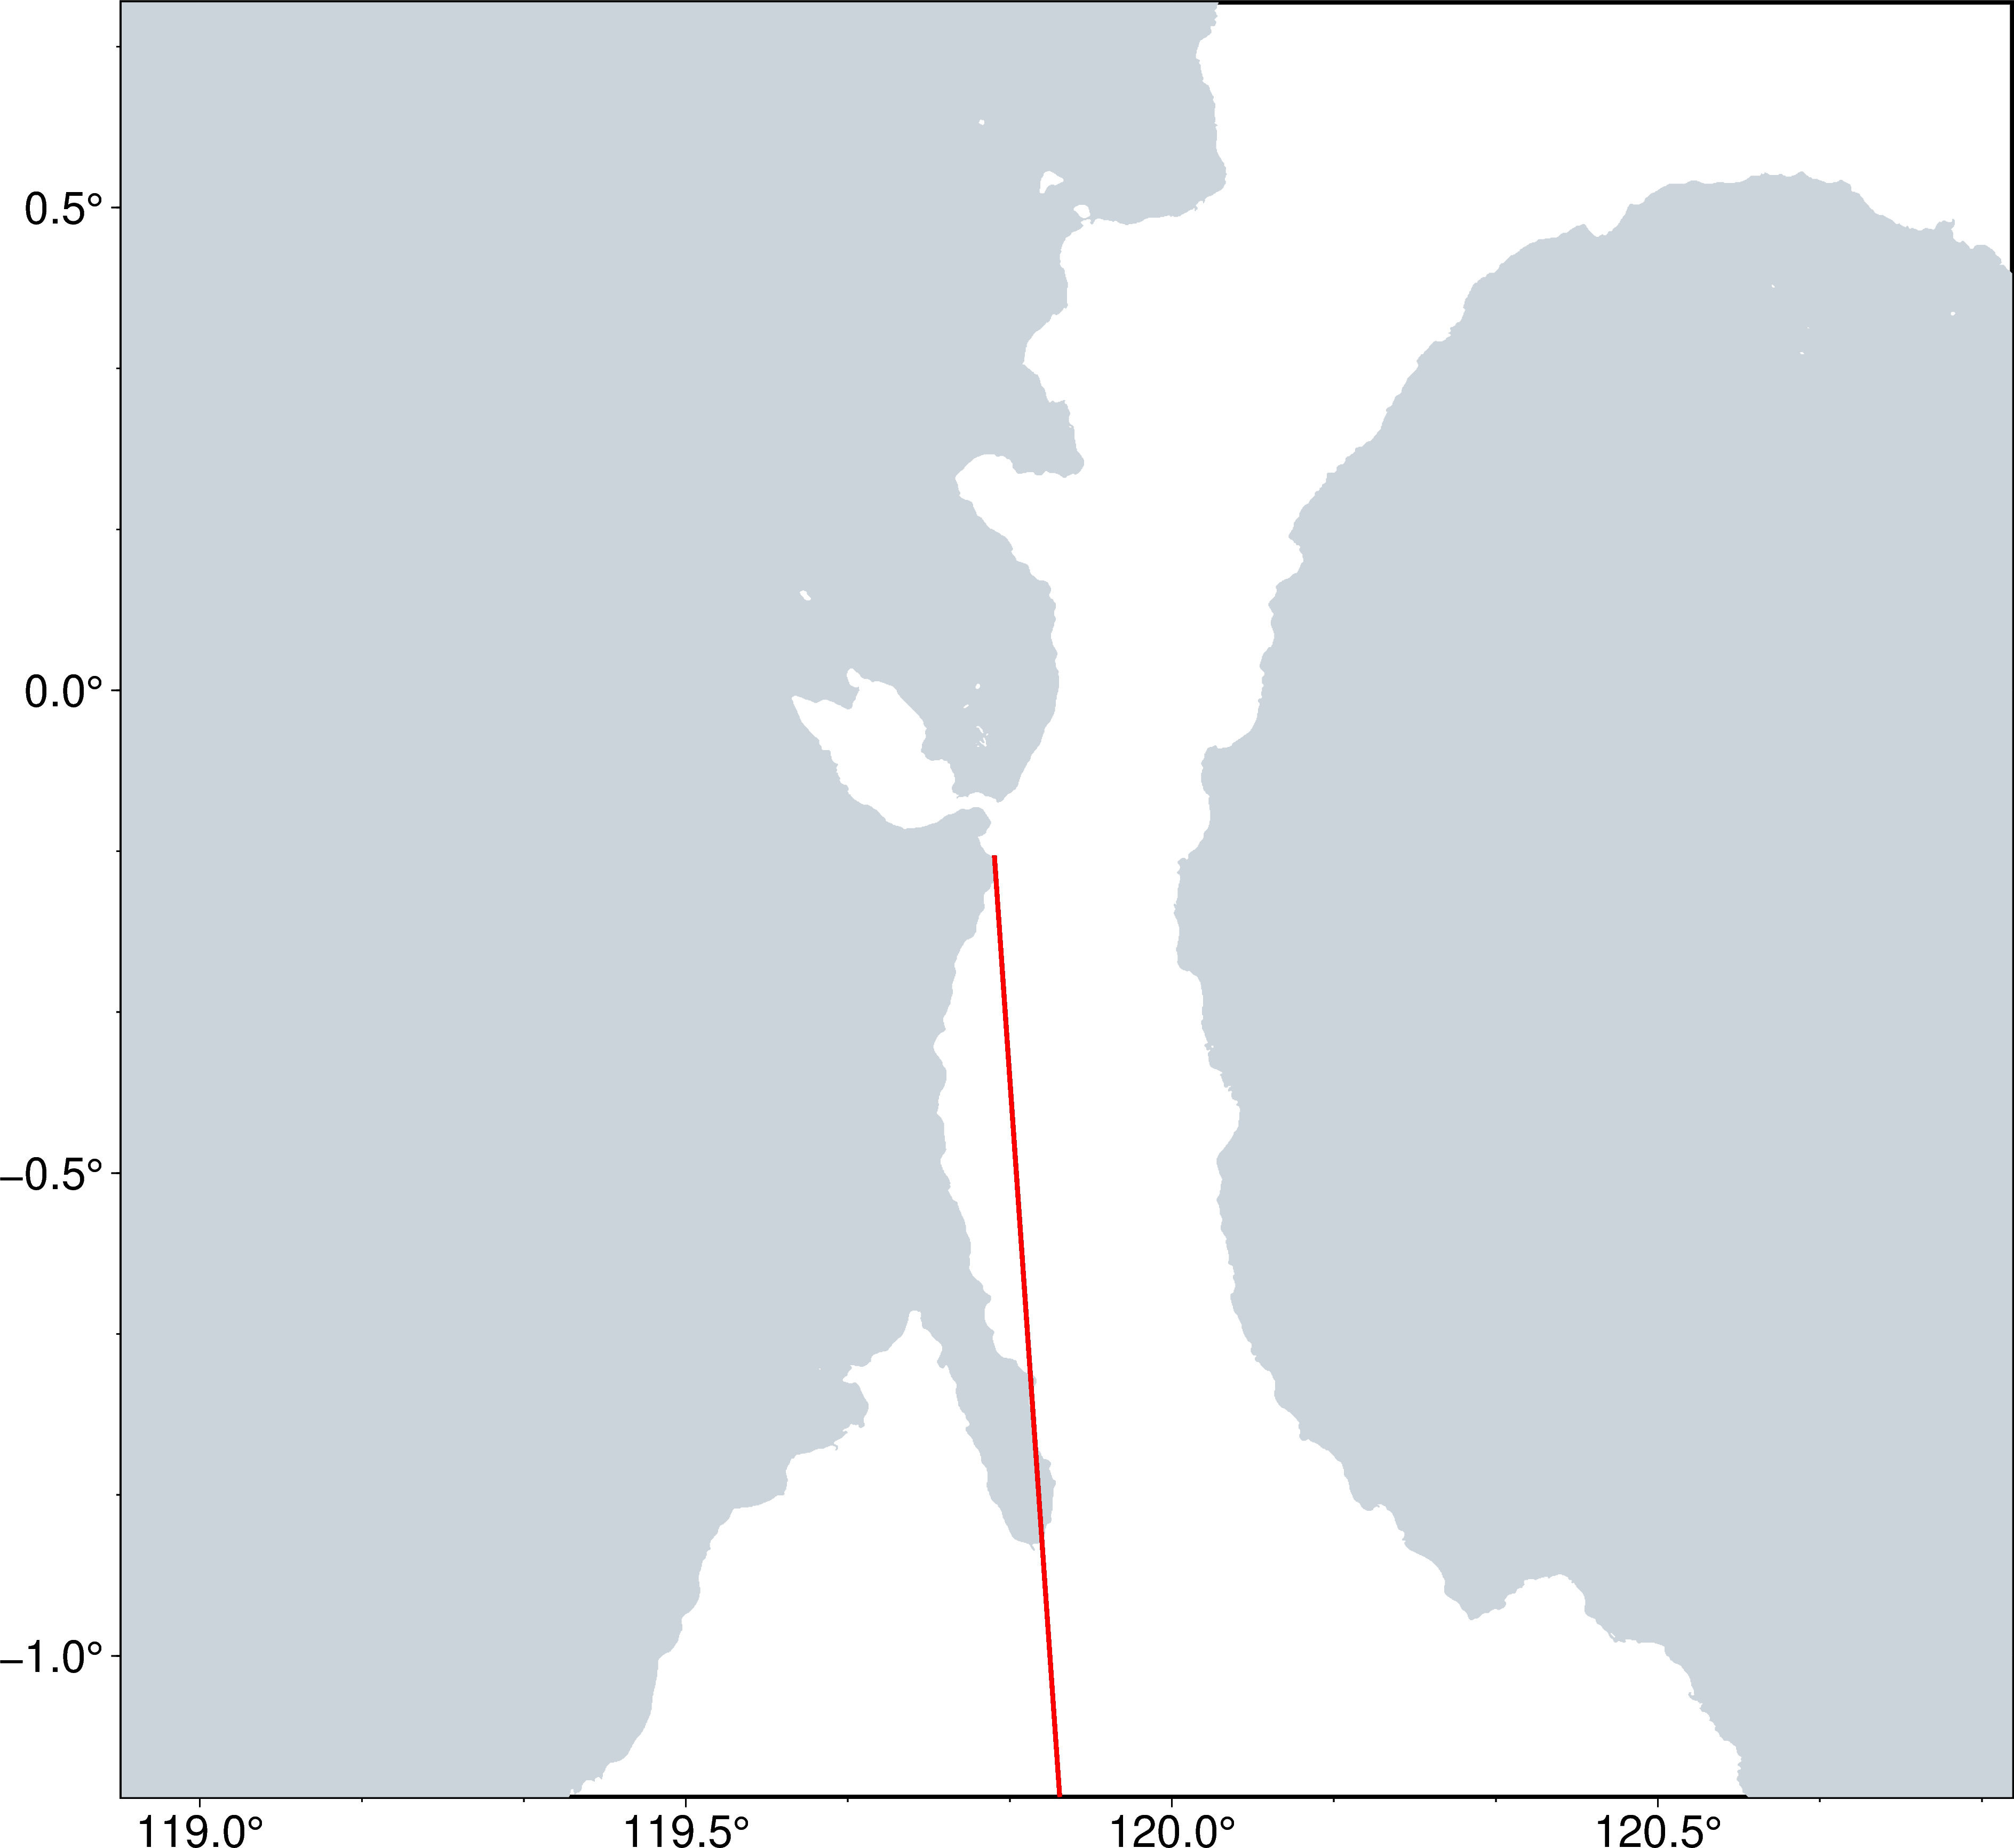

In [52]:
fig.show()
